# 📌 Step 1: Import Libraries

In [ ]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



# 📌 Step 2: Load and Clean Dataset

In [3]:
# 📌 Step 2: Load and Clean Dataset
data = pd.read_csv('netflix1.csv')
data.drop_duplicates(inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data.dropna(subset=['director', 'country'], inplace=True)
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day
data = data.dropna(subset=['director'])  # Drop NaN
data = data[~data['director'].str.strip().str.lower().isin(['', 'not given'])]
print("✅ Data cleaned: Duplicates removed, dates parsed, nulls handled.")

✅ Data cleaned: Duplicates removed, dates parsed, nulls handled.


# 📌 Step 3: Content Type Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_17684\2502971077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


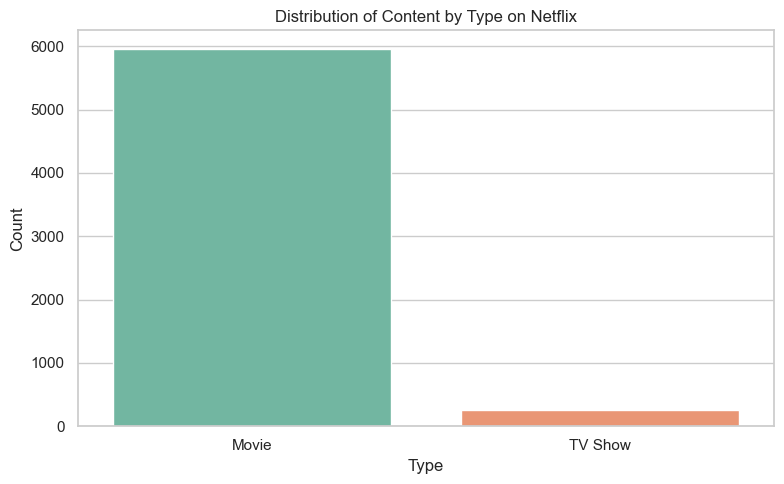

✅ Insight: Netflix has more Movies than TV Shows overall.


In [4]:
# 📌 Step 3: Content Type Distribution
type_counts = data['type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("✅ Insight: Netflix has more Movies than TV Shows overall.")

# 📌 Step 4: Most Common Genres

C:\Users\user\AppData\Local\Temp\ipykernel_17684\2261762955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


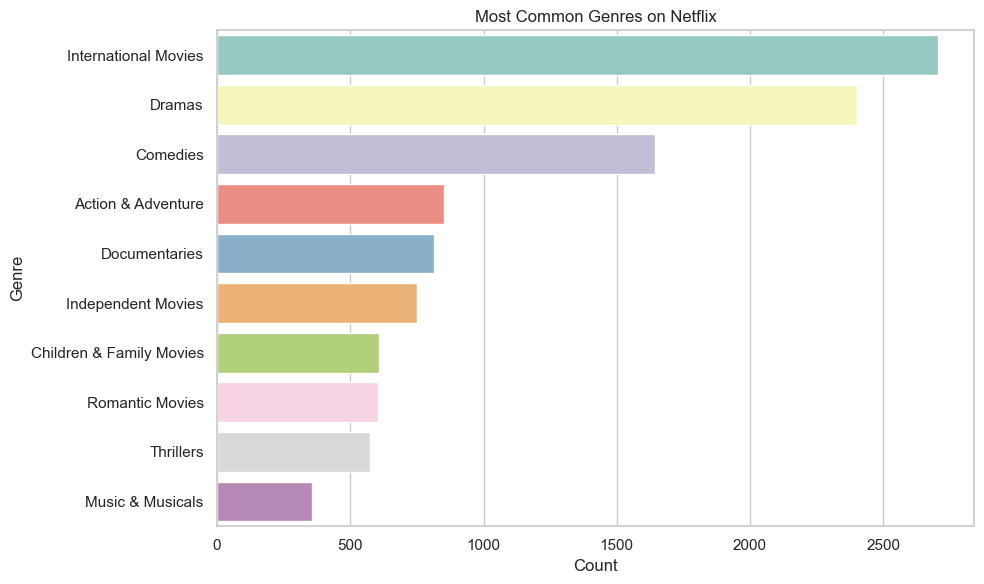

✅ Insight: Drama and Comedy are the most common genres.


In [5]:
# 📌 Step 4: Most Common Genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
print("✅ Insight: Drama and Comedy are the most common genres.")


# 📌 Step 5: Content Added Over Time

C:\Users\user\AppData\Local\Temp\ipykernel_17684\2131077313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


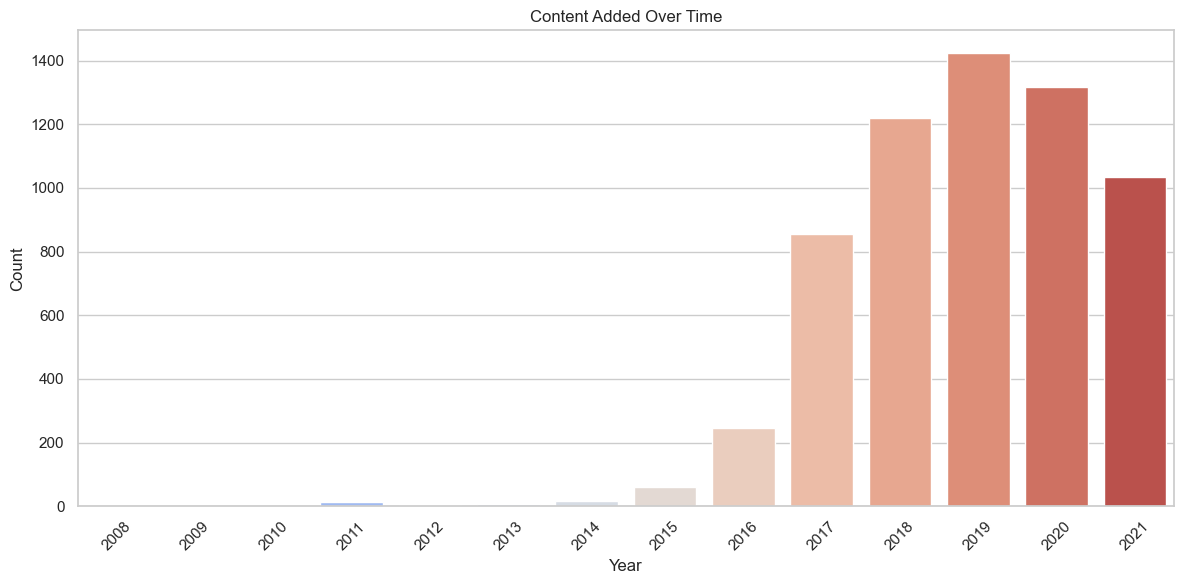

✅ Insight: Netflix saw major content growth from 2016 onwards.


In [6]:
# 📌 Step 5: Content Added Over Time
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("✅ Insight: Netflix saw major content growth from 2016 onwards.")

In [7]:
data['director'].value_counts()

director
Rajiv Chilaka                     20
Raúl Campos, Jan Suter            18
Alastair Fothergill               18
Marcus Raboy                      16
Suhas Kadav                       16
                                  ..
Matt D'Avella                      1
Parthiban                          1
Scott McAboy                       1
Raymie Muzquiz, Stu Livingston     1
Mozez Singh                        1
Name: count, Length: 4527, dtype: int64

# 📌 Step 6: Top 10 Directors

C:\Users\user\AppData\Local\Temp\ipykernel_17684\2003204272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


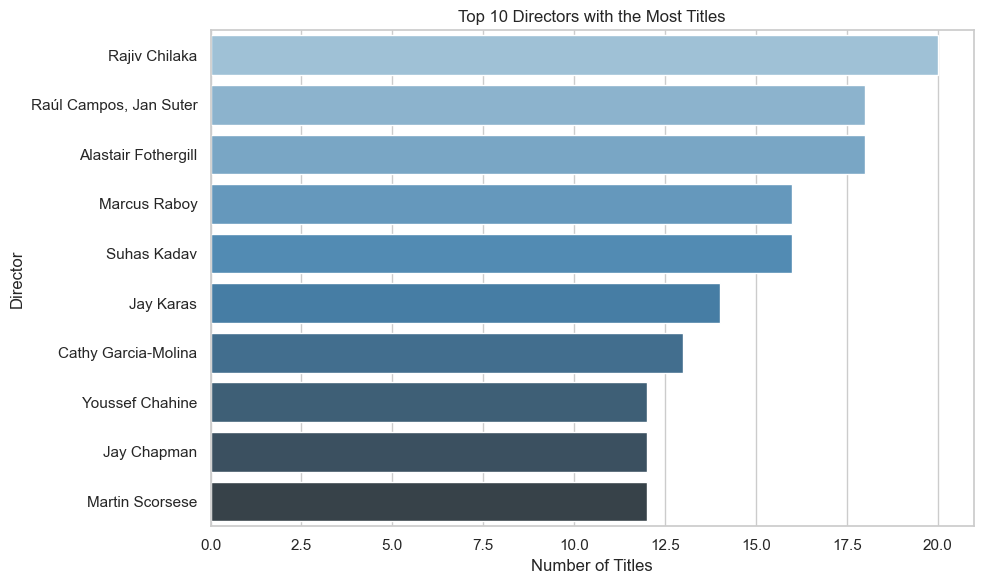

✅ Insight: Rajiv Chilaka is the top contributor, likely due to animated TV content.


In [8]:
# 📌 Step 6: Top 10 Directors
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
print("✅ Insight: Rajiv Chilaka is the top contributor, likely due to animated TV content.")

# 📌 Step 7: Ratings Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_17684\3684456809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


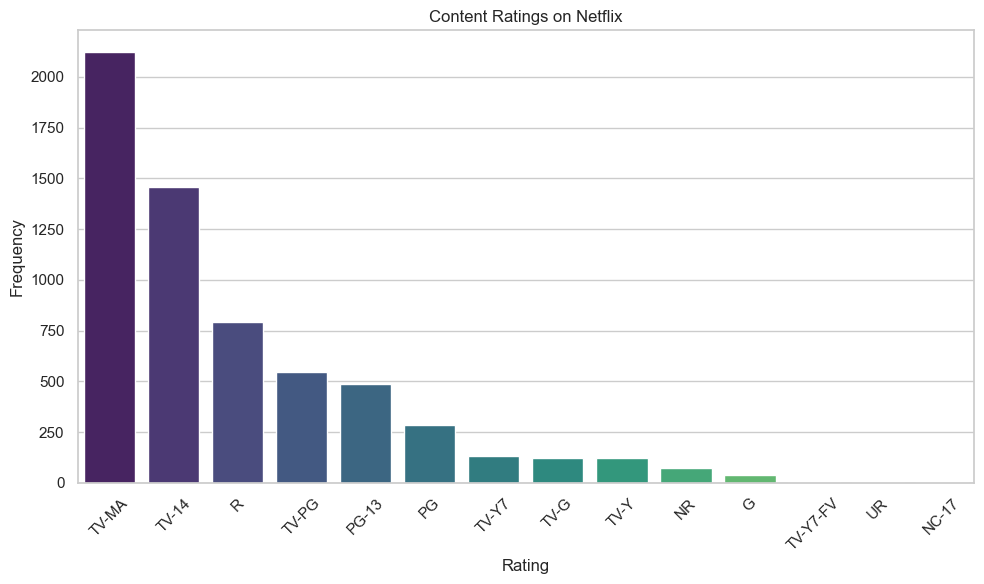

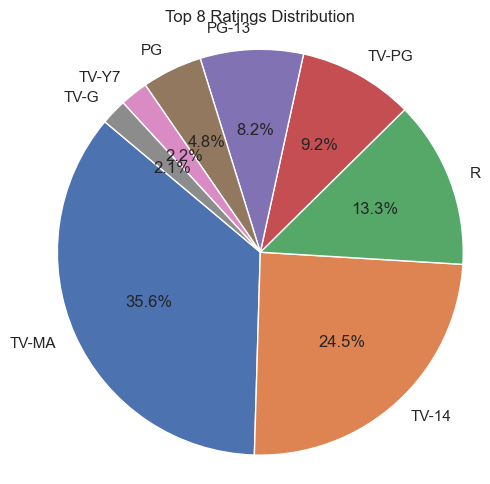

✅ Insight: TV-MA is the most frequent rating, followed by TV-14.


In [9]:
# 📌 Step 7: Ratings Analysis
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(rating_counts.head(8), labels=rating_counts.head(8).index, autopct='%.1f%%', startangle=140)
plt.title('Top 8 Ratings Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()
print("✅ Insight: TV-MA is the most frequent rating, followed by TV-14.")

# 📌 Step 8: Word Cloud of Movie Titles

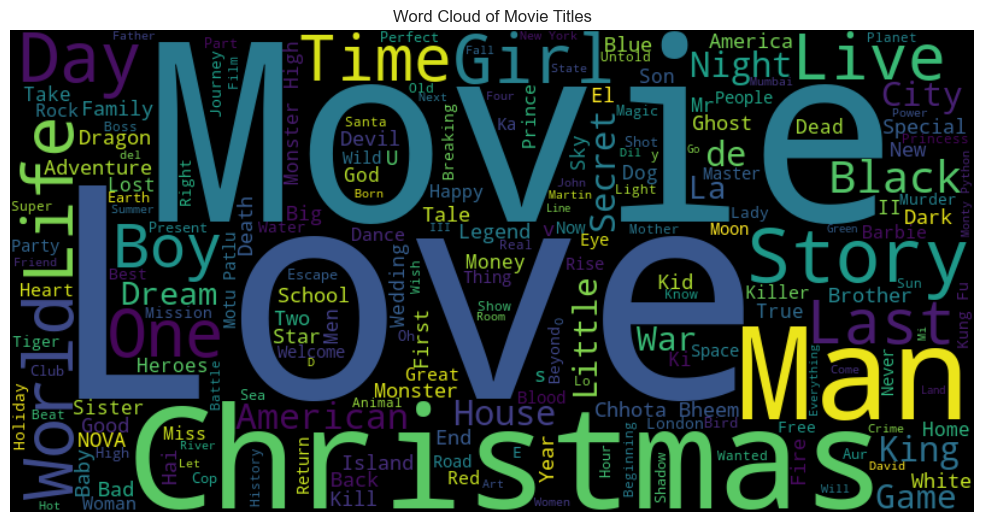

✅ Insight: Word cloud reveals trending keywords in movie titles.


In [12]:
# 📌 Step 8: Word Cloud of Movie Titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.tight_layout()
plt.show()
print("✅ Insight: Word cloud reveals trending keywords in movie titles.")

# 📌 Step 9: Monthly Releases

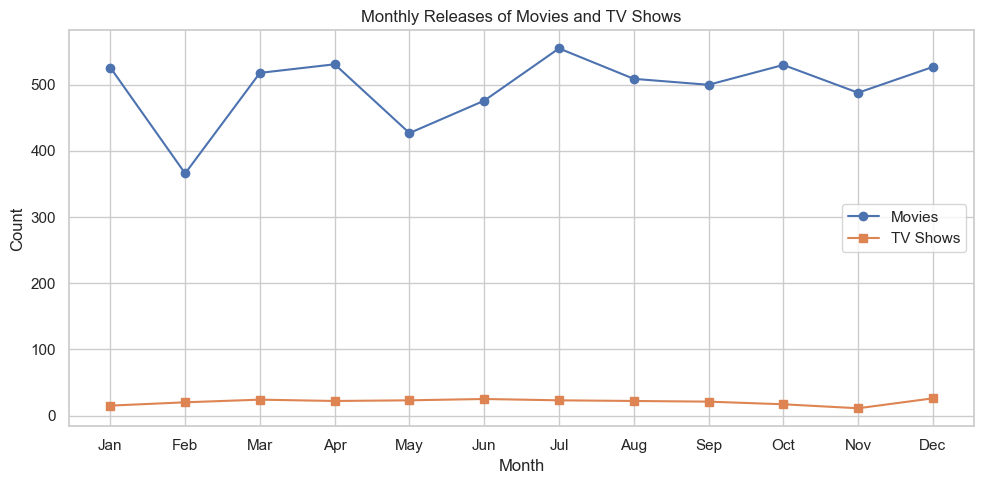

✅ Insight: Most content is released between August and December.


In [13]:
# 📌 Step 9: Monthly Releases
monthly_movie = data[data['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_series = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(monthly_movie.index, monthly_movie.values, label='Movies', marker='o')
plt.plot(monthly_series.index, monthly_series.values, label='TV Shows', marker='s')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly Releases of Movies and TV Shows")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("✅ Insight: Most content is released between August and December.")

# 📌 Step 10: Yearly Releases

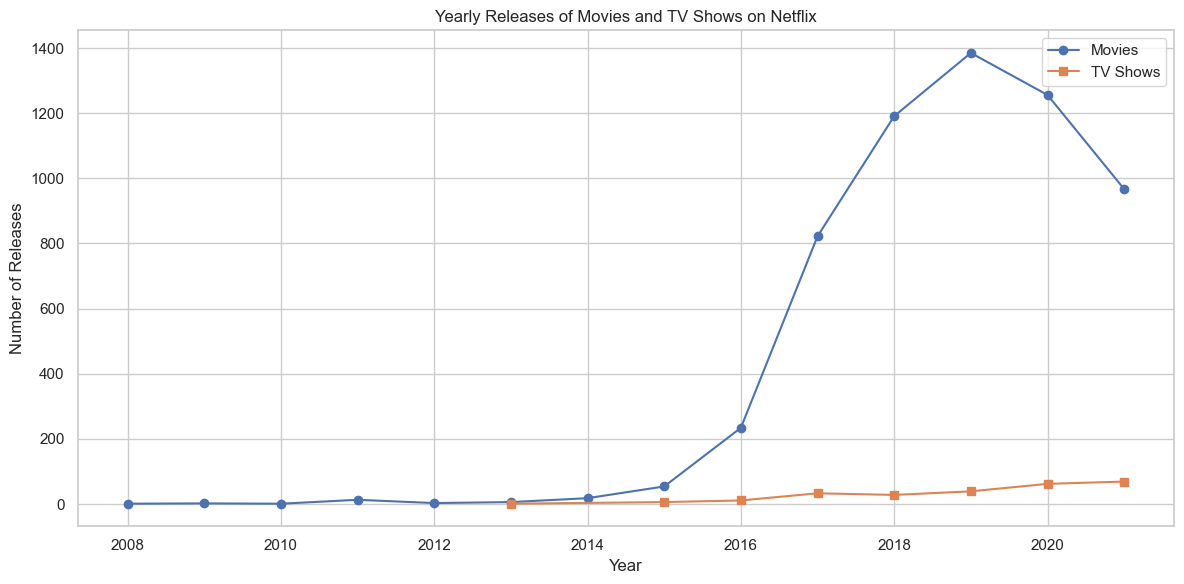

✅ Insight: TV Show releases spiked post-2018, showing a shift in Netflix strategy.


In [14]:
# 📌 Step 10: Yearly Releases
yearly_movie = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_show = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie.index, yearly_movie.values, marker='o', label='Movies')
plt.plot(yearly_show.index, yearly_show.values, marker='s', label='TV Shows')
plt.title('Yearly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print("✅ Insight: TV Show releases spiked post-2018, showing a shift in Netflix strategy.")

# 📌 Step 11: Top Countries

C:\Users\user\AppData\Local\Temp\ipykernel_17684\1680051370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


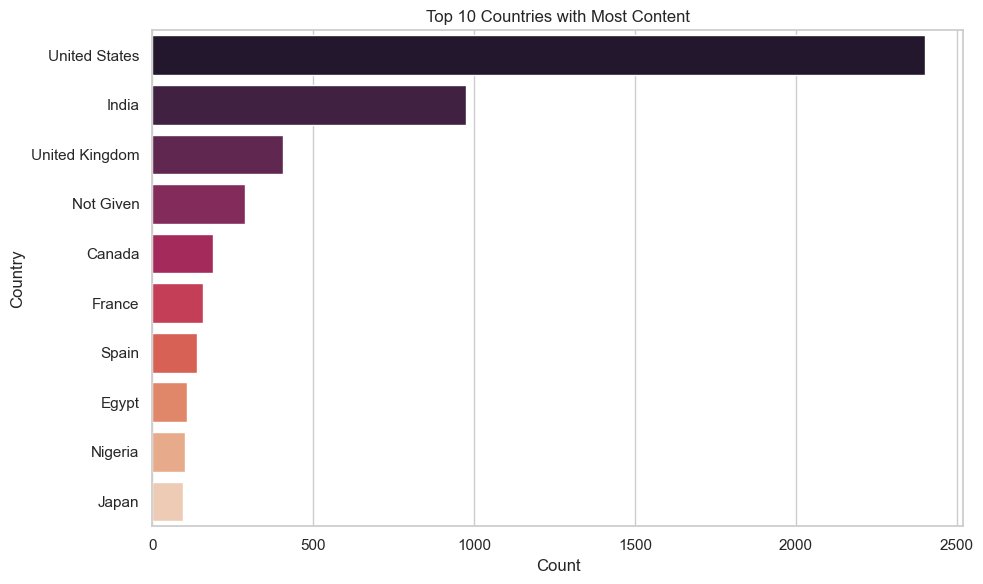

✅ Insight: United States, India, and UK are the top 3 countries with most content.


In [10]:
# 📌 Step 11: Top Countries
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
print("✅ Insight: United States, India, and UK are the top 3 countries with most content.")